<a href="https://colab.research.google.com/github/FGalvao77/Analise-de-sentimentos-do-trailer-do-filme-THE-BATMAN/blob/main/An%C3%A1lise_de_sentimentos_do_trailer_do_filme_THE_BATMAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de "sentimentos" do trailer do filme THE BATMAN**

---



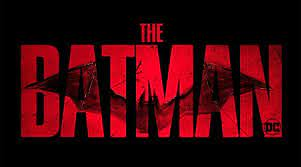

Nessa atividade, iremos realizar uma **análise de sentimentos** do trailer do filme [**`The Batman`**](https://www.youtube.com/watch?v=rsQEor4y2hg) estrelado por **Robert Pattinson**, o vídeo se encontra no [`YouTube`](https://www.youtube.com/) do canal oficial da **Warner Bros. Pictures Brasil**.

Atividade consite em analisar os "sentimentos" do público quanto a expectativa do filme diante da visualização do trailer. Para isso, usaremos técnicas de `"Web Scraping"` e `"NLP"`, com auxílio das bibliotecas `Selenium`, `NLTK` e entre outras.
- toda análise será executada no ambiente do `google colab` que demandará configuar o ambiente para aplicação da análise.

Veja o trailer abaixo.

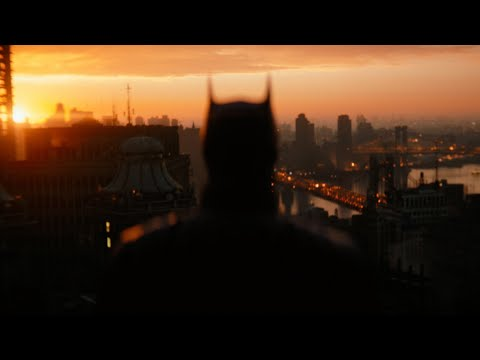

In [1]:
# importando a biblioteca para exibição do vídeo no ambiente do google colab
from IPython.display import YouTubeVideo

# instanciando o vídeo - THE BATMAN
YouTubeVideo("rsQEor4y2hg", width=640)

#### 1. Instalando a biblioteca `selenium` para aplicação da análise.

In [2]:
# instalando a biblioteca
!pip install selenium

     |████████████████████████████████| 954 kB 32.5 MB/s 
     |████████████████████████████████| 138 kB 40.4 MB/s 
     |████████████████████████████████| 356 kB 41.9 MB/s 
     |████████████████████████████████| 3.5 MB 43.9 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
# atualizando os diretórios
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu 

In [4]:
# instalando o "chromedriver" no ambiente do google colab
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 61 not upgraded.
Need to get 95.3 MB of archives.
After this operation, 323 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 94.0.4606.81-0ubuntu0.18.04.1 [1,135 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 94.0.4606.81-0ubuntu0.18.0

In [5]:
# removendo apicações obsoletas
!apt autoremove

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  libnvidia-common-460
0 upgraded, 0 newly installed, 1 to remove and 60 not upgraded.
After this operation, 35.8 kB disk space will be freed.
(Reading database ... 155430 files and directories currently installed.)
Removing libnvidia-common-460 (460.91.03-0ubuntu1) ...


In [6]:
# da biblioteca "selenium" e da função "webdriver" importando "Chrome"
from selenium import webdriver
# from selenium.webdriver import Chrome, ChromeOptions

In [7]:
# instanciando a função ".ChromeOptions()" no objeto "chrome_options"
chrome_options = webdriver.ChromeOptions()
# chrome_options = ChromeOptions()

In [8]:
# configurando o ambiente para executar o chrome driver no ambineto do google colab
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [10]:
# instanciando o "webdriver.Chrome()", como argumento passando a configuração do ambiente
wd_chrome = webdriver.Chrome(chrome_options=chrome_options)
# wd_chrome = Chrome(chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


#### 2. Importando as demais biliotecas para realizar a "raspagem.

In [11]:
# "time" para pegar informações de tempo em tempo  
import time       

# "selenium" para automotizar o processo para conectar ao navegador "Chrome"                                                
# from selenium.webdriver import Chrome                            
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [12]:
# criando uma lista para guardar as informações
data = []

In [13]:
# realizando a "raspagem" do comentários do vídeo
with webdriver.Chrome(chrome_options=chrome_options) as driver:

    wait = WebDriverWait(driver, 20)
    driver.get('https://www.youtube.com/watch?v=rsQEor4y2hg')

    for item in range(60):
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, 'body'))).send_keys(Keys.END)
        time.sleep(20)

    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, '#content'))):
        data.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


In [14]:
# visualizando os 10 primeiros comentários
data[:10]

['SKIP NAVIGATION\nSIGN IN\nUp next in 8\n3:28\nDuna | Trailer Principal Oficial - Legendado\nWarner Bros. Pictures Brasil\n4.1M views • 3 months ago\nCANCEL\nPLAY NOW\n2:38 / 2:38\nBATMAN - Trailer Principal\n6,489,651 viewsOct 16, 2021\n115K\n1.3K\nSHARE\nSAVE\nWarner Bros. Pictures Brasil\n1.9M subscribers\nSUBSCRIBE\nNão é só um chamado... É um aviso.\n\nA Warner Bros. Pictures apresenta “Batman”, de Matt Reeves, estrelando Robert Pattinson no papel duplo do vigilante detetive de Gotham City e seu alter ego, o bilionário recluso Bruce Wayne. Ao lado de Pattinson (“Tenet,” “O Farol”) no elenco de personagens famosos e infames de Gotham City, estrelam Zoë Kravitz (“Big Little Lies”, “Animais Fantásticos: Os Crimes de Grindelwald”) como Selina Kyle; Paul Dano (“The Beach Boys: Uma História de Sucesso”, “12 Anos de Escravidão”) como Edward Nashton; Jeffrey Wright (“007 - Sem Tempo para Morrer”, “Westworld”) como James Gordon do Departamento de Polícia de Gotham City; John Turturro (fil

In [15]:
# visualizando o tamanho da lista
len(data)

1184

Vamos guardar essas informações em um `dataframe` e, com este, iremos realizar todas as etapas da nossa análise.

In [62]:
# importando a biblioteca
import pandas as pd

In [63]:
# instanciando um dataframe com dados salvos na variável "data"
df = pd.DataFrame(data, columns=['comment'])

# visualizando as 5 primeiras linhas
df.head()

,comment
0,SKIP NAVIGATION\nSIGN IN\nUp next in 8\n3:28\n...
1,
2,
3,Não é só um chamado... É um aviso.\n\nA Warner...
4,"Por favor, que esse filme seja bom!!! Porque e..."


In [64]:
# visualizando os comentários da linha 168 à 180
df['comment'][168:188]

168    TOP 👏\nE lindo também esse novo Ator que vai i...
169    É o Batman que queríamos? SIM.\nÉ o que precis...
170                           O hype tá altíssimo slk 🦇❤
171                                Mano, top demais 🔥🔥🔥🔥
172    Sei lá, não consigo hypar os filmes do batman,...
173    Só por tocar Something in the Way do Nirvana j...
174    Esse Batman "visceral" está bem legal, com agi...
175    Hypado demaisssssssss! Isso vai ser um filmaço...
176    só esperando o Ranieri lançar um vídeo sobre e...
177    QUE TRAILER MONSTRUOSO! VIVA O VÍDEO MAKER 👏🏾👏...
178    Meu amigo.. Se o trailer ta sombrio assim, ima...
179    Esse trailer (e o filme) é a prova de que um f...
180    Pesado e bruto - porradeiro tmb, mas esse cená...
181        E lá vem o batman, salvar a DC mais uma vez!!
182               Superou e muito as minhas expectativas
183    Mordi a Língua... Julguei a escolha do ator pr...
184    Mano tá perfeito! Meu hype para esse filme est...
185                            

In [65]:
# visualizando a dimensão do dataframe
df.shape    # linhas e colunas

(1184, 1)

In [66]:
# visualizando o tipo de dado do dataframe
df.dtypes

comment    object
dtype: object

#### 3. Realizando o pré-tratamento dos dados.

In [67]:
# importando as bibliotecas necessárias
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

In [21]:
# instalando os pacotes necessários da biblioteca
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [ ]:
# # realizando o download das "stopwords", "punkt" e "wordnet"
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

In [68]:
# instanciando a variável "stopwords" e configurando-o em português
# sw = stopwords.words('portuguese', 'english')
sw = stopwords.words('portuguese')

In [69]:
# criando uma função para otimizar a "limpeza" dos dados, 
# realizar a "tokenização" das palavras e a remoção das "stopwords"

def clean_text(text):
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^a-zA-Z ]+', '', text)

    # tokenização
    text = nltk.word_tokenize(text)

    # removendo os "stopwords"
    text = [w for w in text if w not in sw]
    
    return text

> **Tokenização**

É o processo de segmentar o texto em execução em frases e palavras. Em essência, é a tarefa de cortar um texto em pedaços chamados `tokens` e, ao mesmo tempo, jogar fora alguns caracteres, como pontuação. Seguindo o nosso exemplo, o resultado da _tokenização _seria:

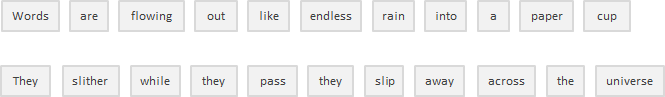

Embora possa parecer básico nesse caso e também em idiomas como o inglês que separam as palavras por um espaço em branco (chamados de idiomas segmentados), nem todos os idiomas se comportam da mesma maneira, como a língua portuguesa que possui diversas conjugações verbais. Então apenas os espaços em branco não são suficientes para executar `tokenizações` apropriadas. A divisão em espaços em branco pode dividir o que deve ser considerado como um símbolo, como no caso de certos nomes (por exemplo, San Francisco ou Nova York) ou frases estrangeiras emprestadas (por exemplo, _laissez faire_).

- Fonte: ILUMEO - [Um guia para NPL - Processamento de Linguagem Natural](https://bit.ly/3BvpeMv)

> **Remoção de Stop Words**

Inclui a eliminação de artigos, pronomes e preposições em idiomas comuns, como "e", "o", “a” em português. Nesse processo, algumas palavras muito comuns que parecem fornecer pouco ou nenhum valor ao objetivo da NPL são filtradas e excluídas do texto a ser processado.

Essas **“stop words”** podem ser ignoradas com segurança, realizando uma pesquisa em uma lista predefinida de palavras-chave, liberando espaço no banco de dados e melhorando o tempo de processamento.

O problema é que a remoção delas pode apagar informações relevantes e modificar o contexto em uma determinada frase. Por exemplo, se estivermos realizando uma análise de sentimentos, podemos desviar nosso algoritmo se removermos uma _stop word_ como `"não"`. Sob essas condições, é possível selecionar uma lista mínima dessas palavras e adicionar termos, dependendo do objetivo específico.

- Fonte: ILUMEO - [Um guia para NPL - Processamento de Linguagem Natural](https://bit.ly/3BvpeMv)

In [70]:
# aplicando a função no datatframe
df['comment'] = df['comment'].apply(lambda x: clean_text(x))

In [71]:
# visualizando o dataframe
df

,comment
0,"[skip, navigationsign, inup, next, in, trailer..."
1,[]
2,[]
3,"[s, chamado, avisoa, warner, bros, pictures, a..."
4,"[favor, filme, bom, porque, trailer, deixou, a..."
...,...
1179,"[achei, trailer, fraco, deve, ser, pq, assisti..."
1180,"[trailer, bem, genrico, filme, super, heri, pr..."
1181,"[ahhhh, cad, coringa, nesse, trailer, d, pra, ..."
1182,"[cara, definitivamente, batman]"


In [54]:
# instanciando a função para lematização
lemmatizer = WordNetLemmatizer()

> **Lematização**

Tem como objetivo reduzir uma palavra à sua forma base e agrupar diferentes formas da mesma palavra. Por exemplo, os verbos no tempo passado são alterados para presente (por exemplo, “foi” é alterado para “vai”) e os sinônimos são unificados (por exemplo, “melhor” é alterado para “bom”), padronizando palavras com significado semelhante à sua raiz. 

_A lematização resolve as palavras em sua forma de dicionário (conhecida como lema), para a qual requer dicionários detalhados nos quais o algoritmo pode pesquisar e vincular palavras aos lemas correspondentes._

Por exemplo, as palavras “correr", "corre" e "correu" são todas formas da palavra "correr", portanto "correr" é o lema de todas as palavras anteriores.

A lematização também leva em consideração o contexto da palavra para **resolver outros problemas, como a desambiguação**, o que significa que ela pode discriminar entre palavras idênticas que têm significados diferentes, dependendo do contexto específico. Pense em palavras como “morcego” (que pode corresponder ao animal ou ao clube de “banco”. Ao fornecer um parâmetro de parte do discurso para uma palavra (seja um substantivo, um verbo etc.), é possível definir um papel para essa palavra na frase e remover a desambiguação.

- Fonte: ILUMEO - [Um guia para NPL - Processamento de Linguagem Natural](https://bit.ly/3BvpeMv)

In [55]:
# criando uma função para realizar a lematizaçaõ
def lem(text):
    text = [lemmatizer.lemmatize(t) for t in text]
    text = [lemmatizer.lemmatize(t, 'v') for t in text]

    return text

In [56]:
# aplicando a função no datataframe
df['comment'] = df['comment'].apply(lambda x: lem(x))

In [57]:
# visualizando o dataframe
df

,comment
0,"[skip, navigationsign, inup, next, in, trailer..."
1,[]
2,[]
3,"[s, chamado, avisoa, warner, bros, picture, ap..."
4,"[favor, filme, bom, porque, trailer, deixou, a..."
...,...
1179,"[achei, trailer, fraco, deve, ser, pq, assisti..."
1180,"[trailer, bem, genrico, filme, super, heri, pr..."
1181,"[ahhhh, cad, coringa, nesse, trailer, d, pra, ..."
1182,"[cara, definitivamente, batman]"


In [81]:
# instanciando uma lista para armazenar as palavras 
all_words = []

# realizando um laço de repetição no dataframe e armazenando as palavras na lista "all_words"
for i in range(len(df)):
    all_words = all_words + df['comment'][i]

In [113]:
# visualizando as 10 primeiras palavras da lista
all_words[:10]

['skip',
 'navigationsign',
 'inup',
 'next',
 'in',
 'trailer',
 'principal',
 'oficial',
 'legendadowarner',
 'bros']

**N-grama**

---
_Origem: Wikipédia, a enciclopédia livre._

Nos campos de [linguística computacional](https://pt.wikipedia.org/wiki/Lingu%C3%ADstica_computacional) e [probabilidade](https://pt.wikipedia.org/wiki/Probabilidade), um n-grama é uma sequência contígua de n itens de uma determinada [amostra](https://pt.wikipedia.org/wiki/Amostra_(estat%C3%ADstica)) de texto ou fala. Os itens podem ser [fonemas](https://pt.wikipedia.org/wiki/Fonema), [sílabas](https://pt.wikipedia.org/wiki/S%C3%ADlaba), [letras](https://pt.wikipedia.org/wiki/Letra), [palavras](https://pt.wikipedia.org/wiki/Palavra) ou [pares de bases](https://pt.wikipedia.org/wiki/Par_de_bases) de acordo com a aplicação. Os n -gramas normalmente são coletados de um corpus de [texto](https://pt.wikipedia.org/wiki/Corpus_lingu%C3%ADstico) ou fala.

Usando prefixos numéricos latinos, um n -grama de tamanho 1 é referido como um "unigrama"; o tamanho 2 é um " bigrama " (ou um "digrama"); o tamanho 3 é um " trigrama ". Os números cardinais são às vezes usados, por exemplo, "quatro grama", "cinco grama" e assim por diante. Em biologia computacional, um [polímero](https://pt.wikipedia.org/wiki/Pol%C3%ADmero) ou [oligômero](https://pt.wikipedia.org/wiki/Olig%C3%B4mero) de tamanho conhecido é chamado k-mero, em vez de n-grama, com nomes específicos usando prefixos numéricos gregos, como "monômero", "dímero", "trímero", "tetrâmero", "pentamer".

- Fonte: https://pt.wikipedia.org/wiki/N-grama

In [82]:
# função para retornar vetores de bigramas
def bigramas(words):
 
    bigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-1):
            break
        else:
            bigrama_obs = words[i] + '_' + words[i+1]
            bigrams.append(bigrama_obs)
 
    return bigrams

In [83]:
# visualizando os bigramas
bigramas(all_words)

['skip_navigationsign',
 'navigationsign_inup',
 'inup_next',
 'next_in',
 'in_trailer',
 'trailer_principal',
 'principal_oficial',
 'oficial_legendadowarner',
 'legendadowarner_bros',
 'bros_pictures',
 'pictures_views',
 'views_months',
 'months_agocancelplay',
 'agocancelplay_trailer',
 'trailer_viewsoct',
 'viewsoct_bros',
 'bros_pictures',
 'pictures_subscriberssubscribeno',
 'subscriberssubscribeno_s',
 's_chamado',
 'chamado_avisoa',
 'avisoa_warner',
 'warner_bros',
 'bros_pictures',
 'pictures_apresenta',
 'apresenta_batman',
 'batman_matt',
 'matt_reeves',
 'reeves_estrelando',
 'estrelando_robert',
 'robert_pattinson',
 'pattinson_papel',
 'papel_duplo',
 'duplo_vigilante',
 'vigilante_detetive',
 'detetive_gotham',
 'gotham_city',
 'city_alter',
 'alter_ego',
 'ego_bilionrio',
 'bilionrio_recluso',
 'recluso_bruce',
 'bruce_wayne',
 'wayne_lado',
 'lado_pattinson',
 'pattinson_tenet',
 'tenet_farol',
 'farol_elenco',
 'elenco_personagens',
 'personagens_famosos',
 'famosos

In [84]:
# função para retornar vetores de trigramas
def trigramas(words):
 
    trigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-2):
            break
        else:
            trigrama_obs = words[i] + '_' + words[i+1] + '_' + words[i+2]
            trigrams.append(trigrama_obs)
 
    return trigrams

In [85]:
# visualizando os trigramas
trigramas(all_words)

['skip_navigationsign_inup',
 'navigationsign_inup_next',
 'inup_next_in',
 'next_in_trailer',
 'in_trailer_principal',
 'trailer_principal_oficial',
 'principal_oficial_legendadowarner',
 'oficial_legendadowarner_bros',
 'legendadowarner_bros_pictures',
 'bros_pictures_views',
 'pictures_views_months',
 'views_months_agocancelplay',
 'months_agocancelplay_trailer',
 'agocancelplay_trailer_viewsoct',
 'trailer_viewsoct_bros',
 'viewsoct_bros_pictures',
 'bros_pictures_subscriberssubscribeno',
 'pictures_subscriberssubscribeno_s',
 'subscriberssubscribeno_s_chamado',
 's_chamado_avisoa',
 'chamado_avisoa_warner',
 'avisoa_warner_bros',
 'warner_bros_pictures',
 'bros_pictures_apresenta',
 'pictures_apresenta_batman',
 'apresenta_batman_matt',
 'batman_matt_reeves',
 'matt_reeves_estrelando',
 'reeves_estrelando_robert',
 'estrelando_robert_pattinson',
 'robert_pattinson_papel',
 'pattinson_papel_duplo',
 'papel_duplo_vigilante',
 'duplo_vigilante_detetive',
 'vigilante_detetive_gotham',

Pra melhorar nossas visualizaçãos iremos plotar gráficos de `unigramas`, `bigramas` e `trigramas`.

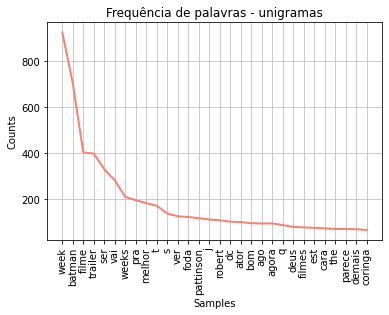

In [86]:
# visualizando as 30 palavras mais frequentes - unigramas
nlp_words = nltk.FreqDist(all_words)
plot1 = nlp_words.plot(30, color = 'salmon', 
                       title = 'Frequência de palavras - unigramas')

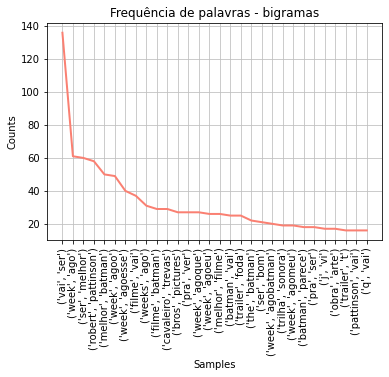

In [88]:
# visualizando as 30 palavras mais frequentes - bigramas
bigrm = list(nltk.bigrams(all_words))
words2 = nltk.FreqDist(bigrm)
words2.plot(30, color = 'salmon', 
           title = 'Frequência de palavras - bigramas')

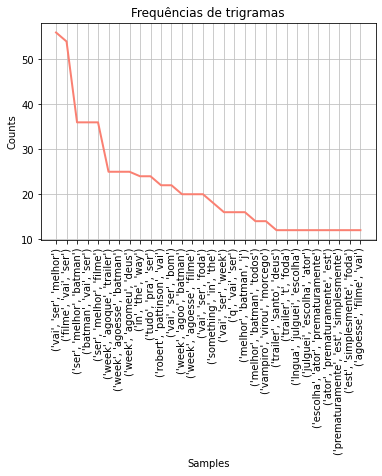

In [77]:
# visualizando as 30 palavras mais frequentes - trigramas
trigrm = list(nltk.trigrams(all_words))
words3 = nltk.FreqDist(trigrm)
words3.plot(30, color = 'salmon', 
           title = 'Frequência de palavras - trigramas')

In [89]:
# importando as bibliotecas necessárias
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [115]:
# exemplos de comentários da lista "all_words"
display(all_words[89:100])
display(all_words[681])
display(all_words[904])
display(all_words[1002])

['turturro',
 'filmes',
 'transformers',
 'the',
 'plot',
 'against',
 'america',
 'carmine',
 'falcone',
 'peter',
 'sarsgaard']

'assisti'

'agora'

'agoadorei'

In [117]:
# realizando a concatenação das palavras
all_summary = ' '.join(s for s in all_words)

In [130]:
# atualizando a lista de stopwords
stopwords = set(STOPWORDS)
stopwords.update(['in', 'the', 'way', 'week', 'weeks', 'q', 'j', 't', 'est', 'batman', 'ago', 'deu'])

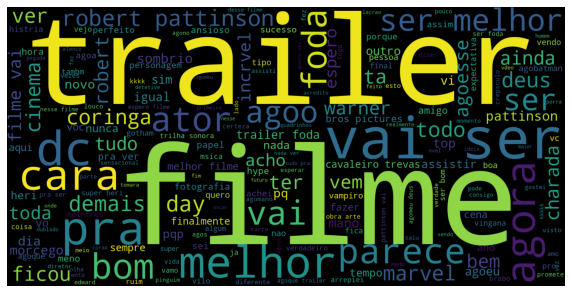

In [135]:
# gerando uma wordcloud - nuvem de palavras
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=1600, height=800).generate(all_summary)
 
# mostrando a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);

# salvando a imagem
wordcloud.to_file('thebatman2021_summary_wordcloud.png');

Vamos criar uma nuvem de palavras com o novo `logo` do **Batman**.

In [199]:
# carregando a imagem para o google colab
from google.colab import files
uploaded = files.upload()

Saving new-logo-thebatman2021.png to new-logo-thebatman2021.png


In [184]:
# importando a biblioteca
import numpy as np

In [200]:
# criando uma máscara com a imagem
batman_mask = np.array(Image.open('/content/new-logo-thebatman2021.png'))

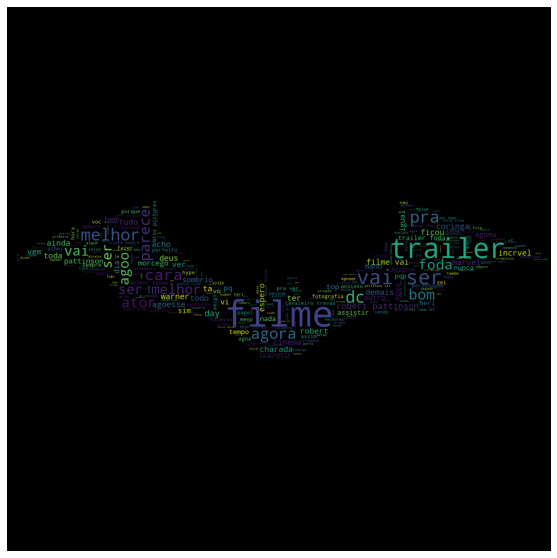

In [201]:
# gerando uma wordcloud - nuvem de palavras com o logo do filme
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=1200, height=620, max_words=300,
                      mask=batman_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)
 
# mostrando a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud)

# salvando a imagem
wordcloud.to_file('thebatman2021_summary_wordcloud2.png');